<a href="https://colab.research.google.com/github/23PA1A05E0/ML/blob/main/LinearRegression_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/boston.csv")

In [3]:
dataset

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
X = dataset.drop("Price" , axis = 1)
y = dataset.Price

In [10]:
## Train test split

In [68]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
X_train

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [21]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = scaler.inverse_transform(X_train)


In [63]:
X_test = scaler.inverse_transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

In [65]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [66]:
mse = cross_val_score(reg,X_train,y_train,cv=5,scoring="neg_mean_squared_error").mean()

In [67]:
np.mean(mse)

np.float64(-25.98440218193114)

In [49]:
reg_pred = reg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


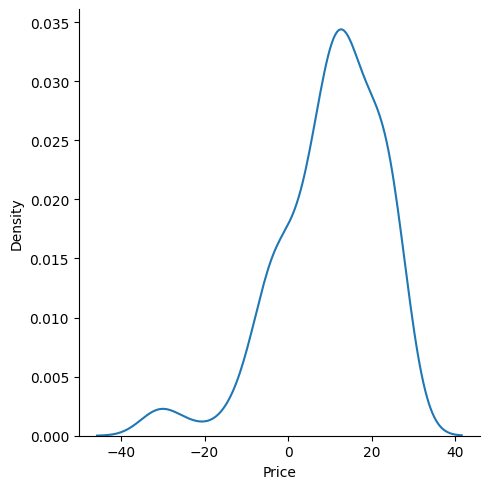

In [53]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind = "kde")

In [54]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score

In [58]:
score = r2_score(reg_pred,y_test)

In [59]:
score

-0.0024216182543375098